
# Classification Algorithms - Hands-On
In this notebook, we will explore different classification algorithms using Python and `scikit-learn`.

We'll cover:
- Binary and Multi-class classification
- Algorithms: k-NN, Logistic Regression, Decision Tree, Random Forest, and SVM
- Evaluation Metrics: Accuracy, Precision, Recall, F1 Score, ROC-AUC


In [2]:

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris, make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, roc_curve, classification_report)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [4]:

def evaluate_model(y_true, y_pred, y_prob=None, binary=True):
    print("Classification Report:")
    print(classification_report(y_true, y_pred))

    if binary and y_prob is not None:
        auc = roc_auc_score(y_true, y_prob)
        print(f"AUC-ROC Score: {auc:.2f}")

        fpr, tpr, _ = roc_curve(y_true, y_prob)
        plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend()
        plt.grid()
        plt.show()


In [6]:

X_bin, y_bin = make_classification(n_samples=1000, n_features=10, n_classes=2,
                                   weights=[0.9, 0.1], random_state=42)

X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_bin, y_bin, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_bin = scaler.fit_transform(X_train_bin)
X_test_bin = scaler.transform(X_test_bin)


### 🔍 EDA: Binary Classification Dataset

Class Distribution:
Target
0    897
1    103
Name: count, dtype: int64


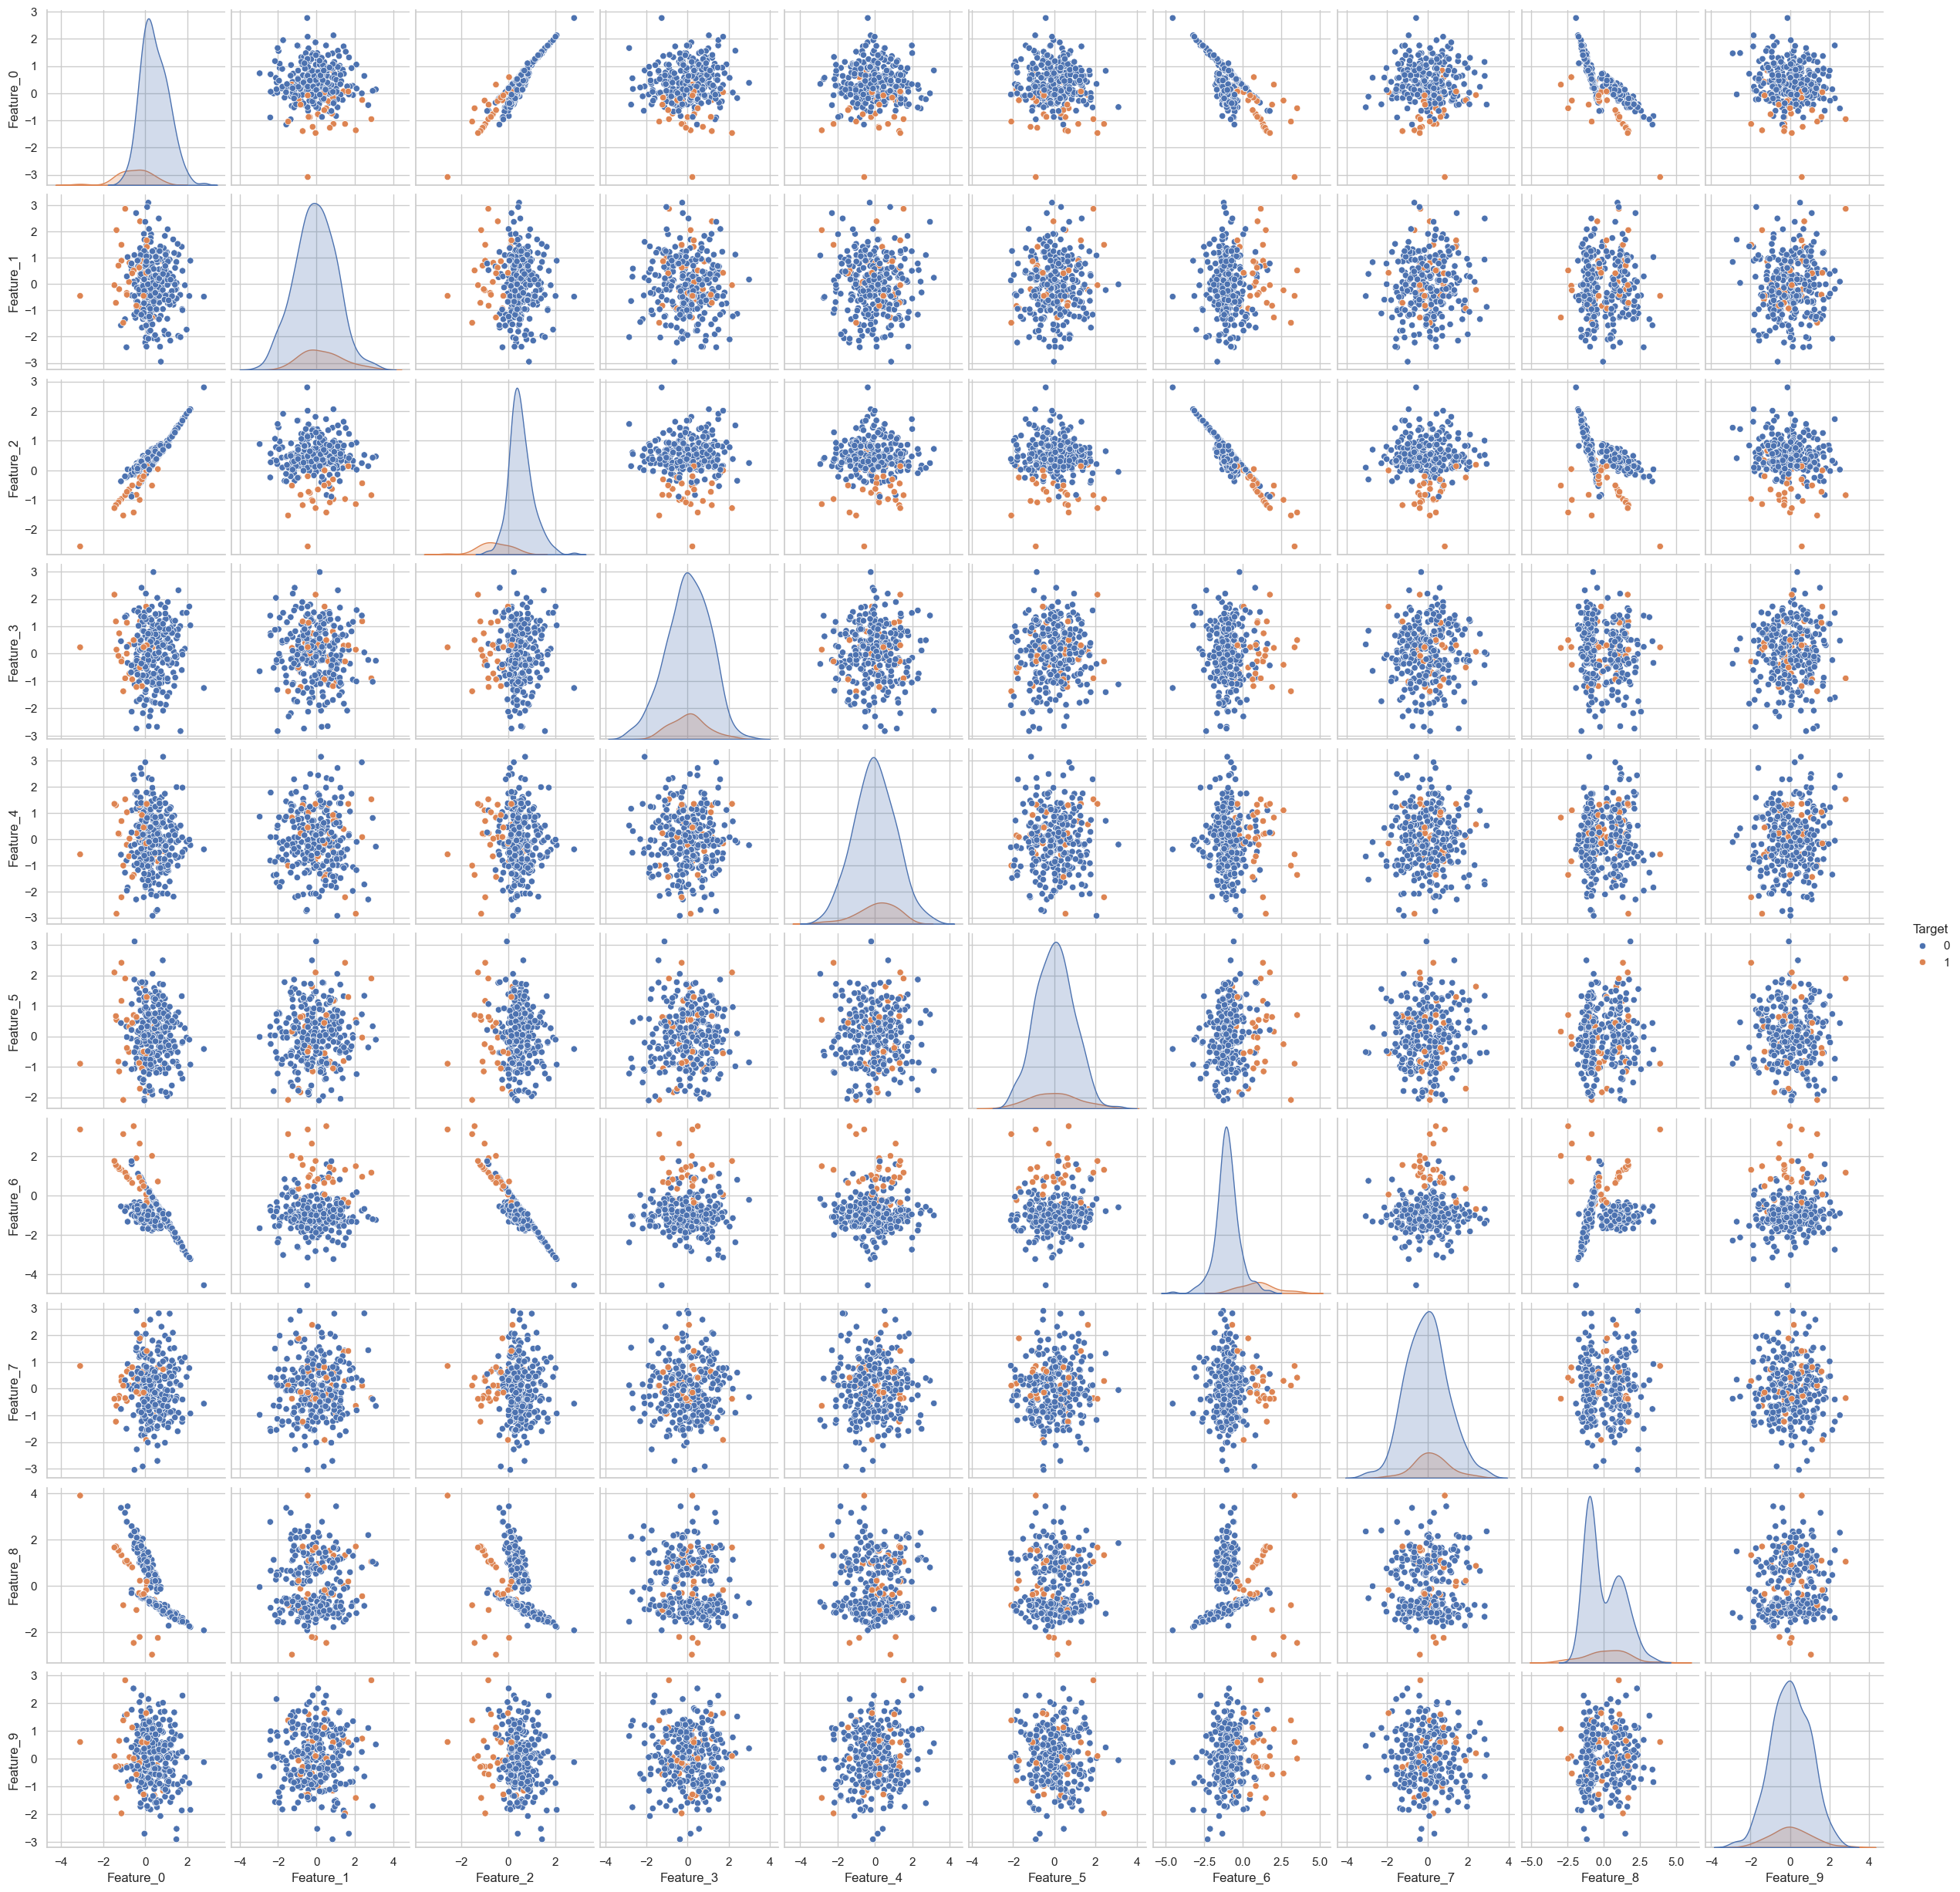

In [9]:

df_bin = pd.DataFrame(X_bin, columns=[f"Feature_{i}" for i in range(X_bin.shape[1])])
df_bin['Target'] = y_bin
print("Class Distribution:")
print(df_bin['Target'].value_counts())

# Visualize pairwise feature relationships for a sample
sns.pairplot(df_bin.sample(300), hue='Target')
plt.show()


### Logistic Regression

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       262
           1       0.73      0.42      0.53        38

    accuracy                           0.91       300
   macro avg       0.82      0.70      0.74       300
weighted avg       0.90      0.91      0.90       300

AUC-ROC Score: 0.92


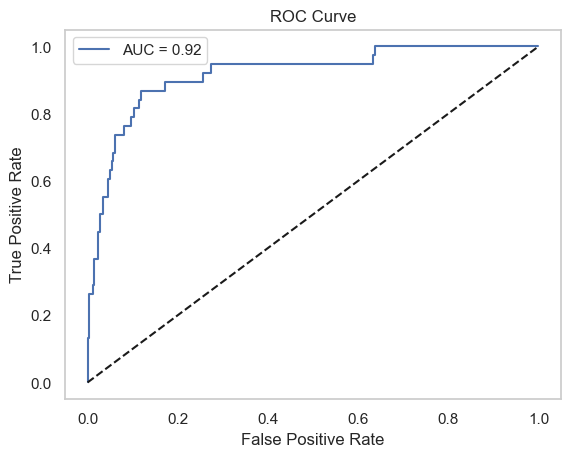

In [11]:

model = LogisticRegression()
model.fit(X_train_bin, y_train_bin)
y_pred = model.predict(X_test_bin)
y_prob = model.predict_proba(X_test_bin)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_test_bin)
evaluate_model(y_test_bin, y_pred, y_prob, binary=True)


### k-Nearest Neighbors

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.95       262
           1       0.93      0.37      0.53        38

    accuracy                           0.92       300
   macro avg       0.92      0.68      0.74       300
weighted avg       0.92      0.92      0.90       300

AUC-ROC Score: 0.86


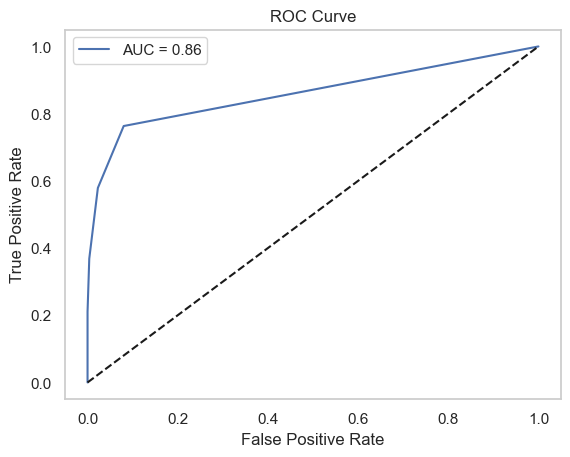

In [15]:

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_bin, y_train_bin)
y_pred = model.predict(X_test_bin)
y_prob = model.predict_proba(X_test_bin)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_test_bin)
evaluate_model(y_test_bin, y_pred, y_prob, binary=True)


### 🔧 Varying `k` in k-NN

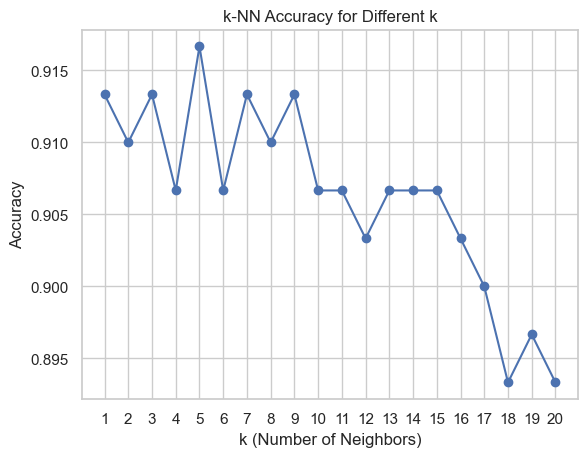

In [18]:

k_range = range(1, 21)
accuracies = []
for k in k_range:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_bin, y_train_bin)
    y_pred_k = knn_model.predict(X_test_bin)
    acc = accuracy_score(y_test_bin, y_pred_k)
    accuracies.append(acc)

plt.plot(k_range, accuracies, marker='o')
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.title("k-NN Accuracy for Different k")
plt.xticks(k_range)
plt.grid(True)
plt.show()


### Decision Tree

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       262
           1       0.84      0.68      0.75        38

    accuracy                           0.94       300
   macro avg       0.90      0.83      0.86       300
weighted avg       0.94      0.94      0.94       300

AUC-ROC Score: 0.83


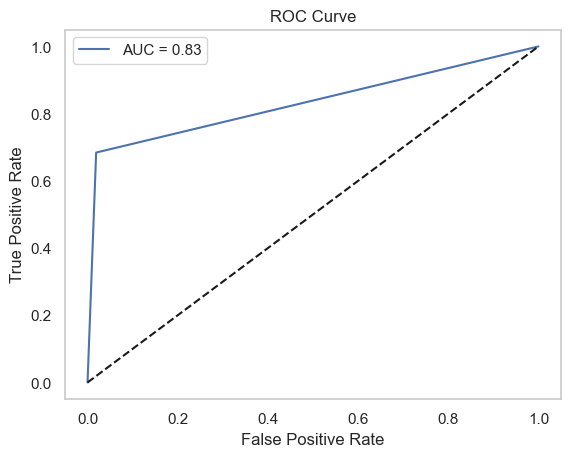

In [21]:

model = DecisionTreeClassifier()
model.fit(X_train_bin, y_train_bin)
y_pred = model.predict(X_test_bin)
y_prob = model.predict_proba(X_test_bin)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_test_bin)
evaluate_model(y_test_bin, y_pred, y_prob, binary=True)


In [23]:
### 🌳 Visualizing the Decision Tree

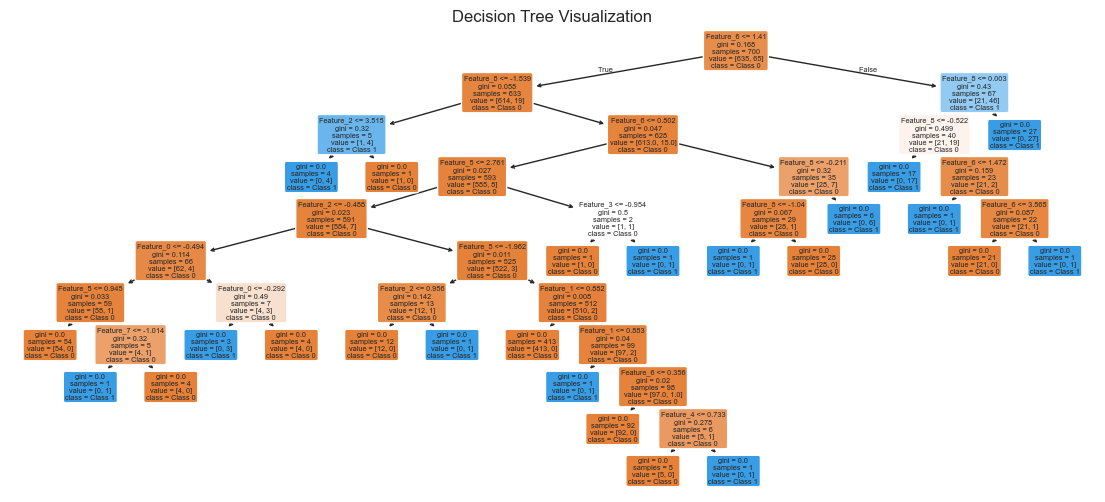

In [25]:

from sklearn import tree as sktree

plt.figure(figsize=(14, 6))
sktree.plot_tree(model, feature_names=[f"Feature_{i}" for i in range(X_bin.shape[1])],
                 class_names=["Class 0", "Class 1"], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()


### Random Forest

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       262
           1       0.88      0.58      0.70        38

    accuracy                           0.94       300
   macro avg       0.91      0.78      0.83       300
weighted avg       0.93      0.94      0.93       300

AUC-ROC Score: 0.91


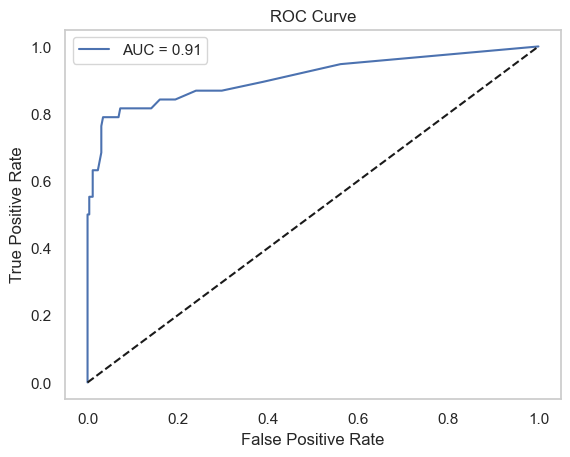

In [28]:

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train_bin, y_train_bin)
y_pred = model.predict(X_test_bin)
y_prob = model.predict_proba(X_test_bin)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_test_bin)
evaluate_model(y_test_bin, y_pred, y_prob, binary=True)


### SVM (Linear Kernel)

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       262
           1       0.75      0.47      0.58        38

    accuracy                           0.91       300
   macro avg       0.84      0.73      0.77       300
weighted avg       0.91      0.91      0.90       300

AUC-ROC Score: 0.90


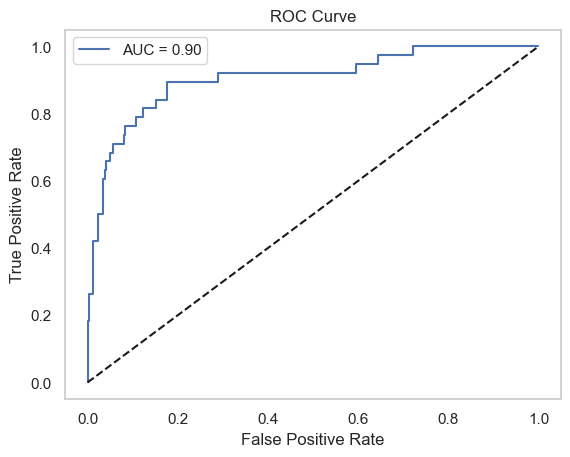

In [31]:

model = SVC(kernel='linear', probability=True)
model.fit(X_train_bin, y_train_bin)
y_pred = model.predict(X_test_bin)
y_prob = model.predict_proba(X_test_bin)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_test_bin)
evaluate_model(y_test_bin, y_pred, y_prob, binary=True)


### Multi-Class Classification (Iris Dataset)

In [34]:

iris = load_iris()
X_iris, y_iris = iris.data, iris.target
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.3, random_state=42)
X_train_iris = scaler.fit_transform(X_train_iris)
X_test_iris = scaler.transform(X_test_iris)


In [36]:
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# View basic info
print(df_iris.head())
print(df_iris['species'].value_counts())

# Summary statistics
print(df_iris.describe())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000 

In [38]:

models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "k-NN": KNeighborsClassifier(n_neighbors=3),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM (RBF Kernel)": SVC(kernel='rbf')
}

for name, model in models.items():
    print(f"\n{name}")
    model.fit(X_train_iris, y_train_iris)
    y_pred = model.predict(X_test_iris)
    evaluate_model(y_test_iris, y_pred, binary=False)



Logistic Regression
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


k-NN
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Decision Tree
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1      


### Summary

- Logistic Regression: Probabilistic model, interpretable  
- k-NN: Simple but computationally expensive  
- Decision Tree: Interpretable, risk of overfitting  
- Random Forest: Ensemble of trees, robust and accurate  
- SVM: Powerful for high-dimensional data, needs tuning  

> Use ROC-AUC for imbalanced binary classification tasks.  
> Use precision-recall trade-off based on business context.
